In [73]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


Provided Coefficient: 0.0003373 mV/Pa
Provided Coefficient: 3.747777777777778e-05 mV/Pa/V
Sensor Coefficient: 0.000323840403879925 mV/Pa
Sensor Coefficient: 3.598226709776944e-05 mV/Pa/V


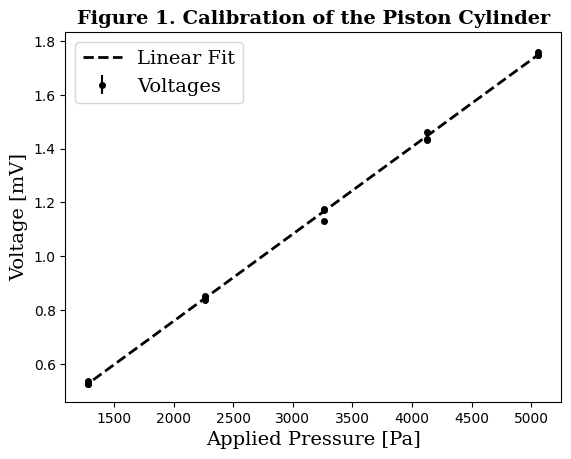

Sensor Coeff 0.39036819730454614 + 0.0029545467813557507 mV / N
R squared: 0.9992558629284835


In [84]:
# Data paths
cm1 = [
    "./Data/calibration mass 1/trial1.csv",
    "./Data/calibration mass 1/trial2.csv",
    "./Data/calibration mass 1/trial3.csv",
]
cm2 = [
    "./Data/calibration mass 2/trial1.csv",
    "./Data/calibration mass 2/trial2.csv",
    "./Data/calibration mass 2/trial3.csv",
]
cm3 = [
    "./Data/calibration mass 3/trial1.csv",
    "./Data/calibration mass 3/trial2.csv",
    "./Data/calibration mass 3/trial3.csv",
]
cm4 = [
    "./Data/calibration mass 4/trial1.csv",
    "./Data/calibration mass 4/trial2.csv",
    "./Data/calibration mass 4/trial3.csv",
]
cm5 = [
    "./Data/calibration mass 5/trial1.csv",
    "./Data/calibration mass 5/trial2.csv",
    "./Data/calibration mass 5/trial3.csv",
]

# Load data
data_cal = [
    np.loadtxt(cm1[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm1[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm1[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm2[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm2[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm2[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm3[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm3[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm3[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm4[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm4[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm4[2], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm5[0], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm5[1], delimiter=",", skiprows=7, usecols=[2]),
    np.loadtxt(cm5[2], delimiter=",", skiprows=7, usecols=[2]),
]

# Area of Piston head in m^2
PISTON_AREA = (np.pi / 4) * (32.5 * 0.001) ** 2

# Total force applied on each trial in Newtons
forces = (
    np.array(
        [
            35.06 + 73.372,
            35.06 + 73.372,
            35.06 + 73.372,
            35.06 + 73.372 + 82.953,
            35.06 + 73.372 + 82.953,
            35.06 + 73.372 + 82.953,
            35.06 + 73.372 + 82.953 + 84.155,
            35.06 + 73.372 + 82.953 + 84.155,
            35.06 + 73.372 + 82.953 + 84.155,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089 + 78.739,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089 + 78.739,
            35.06 + 73.372 + 82.953 + 84.155 + 73.089 + 78.739,
        ]
    )
    * (1 / 1000)
    * 9.80665
)

# Finding average and standard deviation for each trial
points = np.array([data_cal[i][2300:].mean() for i in range(len(data_cal))])
errors = np.array([(data_cal[i][2300:].std() * 2) for i in range(len(data_cal))])

# Linear regression
slope, intercept, rvalue, _, stderr = scipy.stats.linregress(forces, points)
force = np.linspace(1.1, 4.2, 1000)
curve_fit = slope * force + intercept

# Get slope in mV/Pa instead of mV/N
SENSOR_COEFF = slope * PISTON_AREA
print(f"Provided Coefficient: 0.0003373 mV/Pa")
print(f"Provided Coefficient: {0.0003373 / 9} mV/Pa/V")
print(f"Sensor Coefficient: {SENSOR_COEFF} mV/Pa")
print(f"Sensor Coefficient: {SENSOR_COEFF / 9} mV/Pa/V")


# Plotting
font = dict(family="serif", size=14)
title = dict(family="serif", size=14, weight="bold")
marker = dict(color="black", linestyle="none", marker=".", markersize=8)
line = dict(color="black", linestyle="--", linewidth=2)

plt.errorbar(forces / PISTON_AREA, points, errors, label="Voltages", **marker)
plt.plot(force / PISTON_AREA, curve_fit, label="Linear Fit", **line)
plt.xlabel("Applied Pressure [Pa]", **font)
plt.ylabel("Voltage [mV]", **font)
plt.title("Figure 1. Calibration of the Piston Cylinder", **title)
plt.legend(prop=font)
plt.show()

print(f"Sensor Coeff {slope} + {stderr} mV / N")
print(f"R squared: {rvalue ** 2}")




In [75]:
# Data paths
om1 = [
    "./Data/oscillation mass 1/trial1.csv",
    "./Data/oscillation mass 1/trial2.csv",
    "./Data/oscillation mass 1/trial3.csv",
]
om2 = [
    "./Data/oscillation mass 2/trial1.csv",
    "./Data/oscillation mass 2/trial2.csv",
    "./Data/oscillation mass 2/trial3.csv",
]
om3 = [
    "./Data/oscillation mass 3/trial1.csv",
    "./Data/oscillation mass 3/trial2.csv",
    "./Data/oscillation mass 3/trial3.csv",
]
omn = [
    "./Data/oscillation no mass/trial1.csv",
    "./Data/oscillation no mass/trial2.csv",
    "./Data/oscillation no mass/trial3.csv",
]


# Load air oscillation data
data_air = [
    np.loadtxt(om1[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om1[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om1[2], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om2[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om2[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om2[2], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om3[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om3[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(om3[2], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(omn[0], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(omn[1], delimiter=",", skiprows=7, usecols=[1,2]),
    np.loadtxt(omn[2], delimiter=",", skiprows=7, usecols=[1,2]),
]

# In Pa
ATMOSPHERIC_PRESSURE = 101325.0

# Convert mV readings to Pa using calibration coefficient
for i, data_point in enumerate(data_air):
    data_air[i][:, 1] = data_point[:, 1] * (1 / SENSOR_COEFF) + ATMOSPHERIC_PRESSURE


In [114]:
# Piston cylinder device constants in SI units
PISTON_AREA = (np.pi / 4) * ((32.5 * 0.001) ** 2)
TUBE_VOLUME = (43.05 * 0.01) * ((np.pi / 4) * ((3.863 * 0.001) ** 2))
CYLINDER_VOLUME = PISTON_AREA * (60 * 0.001)
TOTAL_VOLUME = TUBE_VOLUME + CYLINDER_VOLUME
# Masses for each trial in kg
PLUNGER_MASS_AIR = np.array(
    [
        73.1 + 35.0,
        73.1 + 35.0,
        73.1 + 35.0,
        157.035 + 35.0,
        157.035 + 35.0,
        157.035 + 35.0,
        241.399 + 35.0,
        241.399 + 35.0,
        241.399 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
    ]
) * (1 / 1000)


# Fuctions defining piston oscillations and getting kappa values
def osc(t, P_0, k, omega, C, phi):
    return P_0 + C * np.exp(-k * t / 2) * np.cos(omega * t + phi)


def calc_kappa(P_0, k, omega, m):
    return (omega**2 + (k**2 / 4)) * ((m * TOTAL_VOLUME) / (P_0 * PISTON_AREA**2))

no_weight_plots = []
weight_plots = []
# Kappa calcs for air

P_0 = []
k = []
omega = []
C = []
phi = []
kappa_air = []

# Hand picked offsets for oscillation starts and ends
start_idxs = [1835, 1415, 1804, 748, 2043, 1920, 1539, 1659, 1038, 2167, 1907, 1980]
end_offset = [600, 400, 600, 600, 800, 400, 500, 500, 400, 800, 1200, 900]
for i, data_point in enumerate(data_air):
    start_idx = start_idxs[i]
    end_idx = start_idx + end_offset[i]
    
    # Initial parameters (P_0, k, omega, C, phi)
    init_params = [data_point[end_idx, 1], 20, 100, data_point[start_idx, 1], 2]
    
    
    osc_t = data_point[start_idx:end_idx, 0] - data_point[start_idx, 0]
    osc_P = data_point[start_idx:end_idx, 1]
    fit_params = scipy.optimize.curve_fit(osc, osc_t, osc_P, p0=init_params)
    
    P_0.append(fit_params[0][0])
    k.append(fit_params[0][1])
    omega.append(fit_params[0][2])
    C.append(fit_params[0][3])
    phi.append(fit_params[0][4])
    
    time = np.linspace(0, osc_t[:end_idx], 1000)
    #print(f"mass: {PLUNGER_MASS_AIR[i] * 1000 - 35.0}\nP_0: {fit_params[0][0]}\nk: {fit_params[0][1]}\nomega: {fit_params[0][2]}\nC: {abs(fit_params[0][3])}\nphi: {fit_params[0][4]}\n")
    
    kappa = calc_kappa(*fit_params[0][:3], PLUNGER_MASS_AIR[i])
    kappa_air.append(kappa)
    
    if i > 8:
        no_weight_plots.append((osc_t, osc_P, fit_params))
    if i > 5 and i < 9:
        weight_plots.append((osc_t, osc_P, fit_params))

params = [P_0, k, omega, C, phi]
labels = ["P_0", "k", "omega", "C", "phi"]  
for i, param in enumerate(params):
    for j in range(4):
        p = np.abs(np.array(param[j*3:j*3+3]))
        print(f"{labels[i]}, mass {j}: {p.mean()} + {p.std() * 2}")

    

no_weight_plots.append((0, 0, 0))
no_weight_plots.append((0, 0, 0))
weight_plots.append((0, 0, 0))
weight_plots.append((0, 0, 0))
print(np.array(kappa_air).mean())
print(np.array(kappa_air).std())

    



P_0, mass 0: 103035.36716313742 + 15.105270181132969
P_0, mass 1: 104057.25889937254 + 70.92306889533863
P_0, mass 2: 105130.48086564541 + 99.87490310652332
P_0, mass 3: 102121.0186895113 + 4.794389355601767
k, mass 0: 48.36000264344042 + 37.2956668758264
k, mass 1: 30.630452049817467 + 12.256435434493499
k, mass 2: 25.637171906914347 + 15.052706515999498
k, mass 3: 29.98651683265955 + 5.910801470102645
omega, mass 0: 115.14464813517058 + 20.799629857604934
omega, mass 1: 84.71598146135888 + 11.176465947322926
omega, mass 2: 77.59410398844518 + 3.4954858322354587
omega, mass 3: 220.5486302263491 + 1.599720797346361
C, mass 0: 19915.448648572044 + 7272.9141020173965
C, mass 1: 19853.3813198107 + 2438.6364229096976
C, mass 2: 16660.141485762142 + 17066.789005631996
C, mass 3: 9734.716752758442 + 2362.2406162927523
phi, mass 0: 1.2045466182262776 + 3.129094836660643
phi, mass 1: 3.1787602214808444 + 0.05645031560100317
phi, mass 2: 3.140800513498061 + 0.2317047383079635
phi, mass 3: 1.677

In [115]:
argon_data = [
    np.loadtxt("./Data/argon mass 1.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
    np.loadtxt("./Data/argon mass 2.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
    np.loadtxt("./Data/argon mass 3.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
    np.loadtxt("./Data/argon mass 4.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
]

# Trial cutoffs formatted as (start, end)
m1_cutoffs = [(500, 2500), (2501, 4500), (4501, 6500), (8000, 9500), (9501, 11500)]
m2_cutoffs = [(1000, 2500), (2501, 4600), (4601, 6500), (6501, 8500), (8501, 10500)]
m3_cutoffs = [(1000, 2600), (2601, 4500), (4501, 6500), (6501, 8500), (8501, 10500)]
m4_cutoffs = [(1500, 3500), (3501, 5500), (5501, 7500), (7501, 9500), (9501, 12000)]

data_argon = [
    argon_data[0][m1_cutoffs[0][0] : m1_cutoffs[0][1]],
    argon_data[0][m1_cutoffs[1][0] : m1_cutoffs[1][1]],
    argon_data[0][m1_cutoffs[2][0] : m1_cutoffs[2][1]],
    argon_data[0][m1_cutoffs[3][0] : m1_cutoffs[3][1]],
    argon_data[0][m1_cutoffs[4][0] : m1_cutoffs[4][1]],
    argon_data[1][m2_cutoffs[0][0] : m2_cutoffs[0][1]],
    argon_data[1][m2_cutoffs[1][0] : m2_cutoffs[1][1]],
    argon_data[1][m2_cutoffs[2][0] : m2_cutoffs[2][1]],
    argon_data[1][m2_cutoffs[3][0] : m2_cutoffs[3][1]],
    argon_data[1][m2_cutoffs[4][0] : m2_cutoffs[4][1]],
    argon_data[2][m3_cutoffs[0][0] : m3_cutoffs[0][1]],
    argon_data[2][m3_cutoffs[1][0] : m3_cutoffs[1][1]],
    argon_data[2][m3_cutoffs[2][0] : m3_cutoffs[2][1]],
    argon_data[2][m3_cutoffs[3][0] : m3_cutoffs[3][1]],
    argon_data[2][m3_cutoffs[4][0] : m3_cutoffs[4][1]],
    argon_data[3][m4_cutoffs[0][0] : m4_cutoffs[0][1]],
    argon_data[3][m4_cutoffs[1][0] : m4_cutoffs[1][1]],
    argon_data[3][m4_cutoffs[2][0] : m4_cutoffs[2][1]],
    argon_data[3][m4_cutoffs[3][0] : m4_cutoffs[3][1]],
    argon_data[3][m4_cutoffs[4][0] : m4_cutoffs[4][1]],
]

for i, data_point in enumerate(data_argon):
    data_argon[i][:, 1] = data_point[:, 1] * (1 / SENSOR_COEFF) + ATMOSPHERIC_PRESSURE

# Masses for each trial in kg
PLUNGER_MASS_ARGON = np.array(
    [
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        74.475 + 35.0,
        74.475 + 35.0,
        74.475 + 35.0,
        74.475 + 35.0,
        74.475 + 35.0,
        148.179 + 35.0,
        148.179 + 35.0,
        148.179 + 35.0,
        148.179 + 35.0,
        148.179 + 35.0,
        222.140 + 35.0,
        222.140 + 35.0,
        222.140 + 35.0,
        222.140 + 35.0,
        222.140 + 35.0,
    ]
) * (1 / 1000)

kappa_argon = []
P_0 = []
k = []
omega = []
C = []
phi = []
for i, data in enumerate(data_argon):
    start_idx = data[:, 1].argmax()
    end_idx = start_idx + 600

    # Initial parameters (P_0, k, omega, C, phi)
    init_params = [data[end_idx, 1], 20, 100, data[start_idx, 1], 2]

    osc_t = data[start_idx:end_idx, 0] - data[start_idx, 0]
    osc_P = data[start_idx:end_idx, 1]
    fit_params = scipy.optimize.curve_fit(osc, osc_t, osc_P, p0=init_params)
    time = np.linspace(0, osc_t[:end_idx], 1000)

    P_0.append(fit_params[0][0])
    k.append(fit_params[0][1])
    omega.append(fit_params[0][2])
    C.append(fit_params[0][3])
    phi.append(fit_params[0][4])

    kappa = calc_kappa(*fit_params[0][:3], PLUNGER_MASS_ARGON[i])
    kappa_argon.append(kappa)
    
    if i < 5:
        no_weight_plots.append((osc_t, osc_P, fit_params))
    if i > 14:
        weight_plots.append((osc_t, osc_P, fit_params))
    
params = [P_0, k, omega, C, phi]
labels = ["P_0", "k", "omega", "C", "phi"]  
for i, param in enumerate(params):
    for j in range(4):
        p = np.abs(np.array(param[j*3:j*3+3]))
        print(f"{labels[i]}, mass {j}: {p.mean()} + {p.std() * 2}")
print(np.array(kappa_argon).mean())
print(np.array(kappa_argon).std())


P_0, mass 0: 102190.6943367847 + 1.7283004894053067
P_0, mass 1: 102485.02330279337 + 838.1605522974835
P_0, mass 2: 103097.99088413187 + 18.20490014076608
P_0, mass 3: 103675.74708750601 + 808.3420782253573
k, mass 0: 33.166292326064315 + 3.16790292985851
k, mass 1: 35.37231107537855 + 6.597519508306137
k, mass 2: 40.79094900508065 + 2.2217656911008143
k, mass 3: 48.52487194109852 + 44.312400838723704
omega, mass 0: 234.72741994612616 + 1.591414257137038
omega, mass 1: 198.43801151678875 + 102.96043690385537
omega, mass 2: 120.71920138497194 + 2.0594935665938574
omega, mass 3: 94.14443358872427 + 4.446583543414703
C, mass 0: 10597.374732862327 + 1417.0270439251613
C, mass 1: 10181.612397348777 + 2669.7740444054557
C, mass 2: 15433.609503101865 + 3457.3603632677846
C, mass 3: 22694.863772533 + 6705.149451463617
phi, mass 0: 0.13671060846077102 + 0.17716085135048687
phi, mass 1: 0.11725929716497992 + 0.11448319362829616
phi, mass 2: 0.21501553005083676 + 0.10588103665581763
phi, mass 3:

In [116]:
co2_data = [
    np.loadtxt("./Data/co2 mass 1.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
    np.loadtxt("./Data/co2 mass 2.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
    np.loadtxt("./Data/co2 mass 3.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
    np.loadtxt("./Data/co2 mass 4.csv", delimiter=",", skiprows=7, usecols=[1, 2]),
]

# Trial cutoffs formatted as (start, end)
m1_cutoffs = [(1500, 3000), (3001, 4600), (4601, 6500), (6501, 8500), (8501, 10000)]
m2_cutoffs = [(500, 2500), (2501, 4500), (4501, 6000), (6500, 8000), (8750, 10000)]
m3_cutoffs = [(500, 2000), (2500, 4000), (4500, 6500), (6501, 8500), (8501, 10500)]
m4_cutoffs = [(1000, 2500), (3000, 5000), (5001, 7000), (7001, 9000), (9500, 11500)]

data_co2 = [
    co2_data[0][m1_cutoffs[0][0] : m1_cutoffs[0][1]],
    co2_data[0][m1_cutoffs[1][0] : m1_cutoffs[1][1]],
    co2_data[0][m1_cutoffs[2][0] : m1_cutoffs[2][1]],
    co2_data[0][m1_cutoffs[3][0] : m1_cutoffs[3][1]],
    co2_data[0][m1_cutoffs[4][0] : m1_cutoffs[4][1]],
    co2_data[1][m2_cutoffs[0][0] : m2_cutoffs[0][1]],
    co2_data[1][m2_cutoffs[1][0] : m2_cutoffs[1][1]],
    co2_data[1][m2_cutoffs[2][0] : m2_cutoffs[2][1]],
    co2_data[1][m2_cutoffs[3][0] : m2_cutoffs[3][1]],
    co2_data[1][m2_cutoffs[4][0] : m2_cutoffs[4][1]],
    co2_data[2][m3_cutoffs[0][0] : m3_cutoffs[0][1]],
    co2_data[2][m3_cutoffs[1][0] : m3_cutoffs[1][1]],
    co2_data[2][m3_cutoffs[2][0] : m3_cutoffs[2][1]],
    co2_data[2][m3_cutoffs[3][0] : m3_cutoffs[3][1]],
    co2_data[2][m3_cutoffs[4][0] : m3_cutoffs[4][1]],
    co2_data[3][m4_cutoffs[0][0] : m4_cutoffs[0][1]],
    co2_data[3][m4_cutoffs[1][0] : m4_cutoffs[1][1]],
    co2_data[3][m4_cutoffs[2][0] : m4_cutoffs[2][1]],
    co2_data[3][m4_cutoffs[3][0] : m4_cutoffs[3][1]],
    co2_data[3][m4_cutoffs[4][0] : m4_cutoffs[4][1]],
]

for i, data_point in enumerate(data_co2):
    data_co2[i][:, 1] = data_point[:, 1] * (1 / SENSOR_COEFF) + ATMOSPHERIC_PRESSURE

# Masses for each trial in kg
PLUNGER_MASS_CO2 = np.array(
    [
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        0.0 + 35.0,
        73.593 + 35.0,
        73.593 + 35.0,
        73.593 + 35.0,
        73.593 + 35.0,
        73.593 + 35.0,
        147.191 + 35.0,
        147.191 + 35.0,
        147.191 + 35.0,
        147.191 + 35.0,
        147.191 + 35.0,
        221.799 + 35.0,
        221.799 + 35.0,
        221.799 + 35.0,
        221.799 + 35.0,
        221.799 + 35.0,
    ]
) * (1 / 1000)

kappa_co2 = []
P_0 = []
k = []
omega = []
C = []
phi = []
for i, data in enumerate(data_co2):
    start_idx = data[:, 1].argmax()
    end_idx = start_idx + 600

    # Initial parameters (P_0, k, omega, C, phi)
    init_params = [data[end_idx, 1], 20, 100, data[start_idx, 1], 2]

    osc_t = data[start_idx:end_idx, 0] - data[start_idx, 0]
    osc_P = data[start_idx:end_idx, 1]
    fit_params = scipy.optimize.curve_fit(osc, osc_t, osc_P, p0=init_params)
    time = np.linspace(0, osc_t[:end_idx], 1000)

    P_0.append(fit_params[0][0])
    k.append(fit_params[0][1])
    omega.append(fit_params[0][2])
    C.append(fit_params[0][3])
    phi.append(fit_params[0][4])

    kappa = calc_kappa(*fit_params[0][:3], PLUNGER_MASS_CO2[i])
    kappa_co2.append(kappa)
    #print(f"Kappa: {kappa}")

    if i < 5:
        no_weight_plots.append((osc_t, osc_P, fit_params))
    if i > 14:
        weight_plots.append((osc_t, osc_P, fit_params))
    
params = [P_0, k, omega, C, phi]
labels = ["P_0", "k", "omega", "C", "phi"]  
for i, param in enumerate(params):
    for j in range(4):
        p = np.abs(np.array(param[j*3:j*3+3]))
        print(f"{labels[i]}, mass {j}: {p.mean()} + {p.std() * 2}")

print(np.array(kappa_co2).mean())
print(np.array(kappa_co2).std())


P_0, mass 0: 102239.85278406937 + 6.41370964468298
P_0, mass 1: 102538.48049014172 + 836.7346143234145
P_0, mass 2: 103116.6866815164 + 12.062310947378416
P_0, mass 3: 103679.6933927822 + 800.7629771147455
k, mass 0: 28.300085638321757 + 2.0875497349049343
k, mass 1: 34.22212433112953 + 12.065600142634569
k, mass 2: 45.556037425258154 + 6.904707205310547
k, mass 3: 37.7644482172773 + 16.61581826001648
omega, mass 0: 213.73218102830268 + 1.938850700479485
omega, mass 1: 184.07457418393426 + 95.25732539910683
omega, mass 2: 116.66867733046767 + 1.5431694786562247
omega, mass 3: 95.1682815335722 + 29.078904483620622
C, mass 0: 12170.99524780619 + 1105.2588584490618
C, mass 1: 13781.866241563786 + 4106.006731033654
C, mass 2: 12681.447638585616 + 2632.6502315720686
C, mass 3: 13449.327288287264 + 1965.975604207781
phi, mass 0: 0.1495857218191841 + 0.15382849564328174
phi, mass 1: 0.13247760355819294 + 0.037575669840501334
phi, mass 2: 0.20061886850864094 + 0.019295602600483176
phi, mass 3:

15


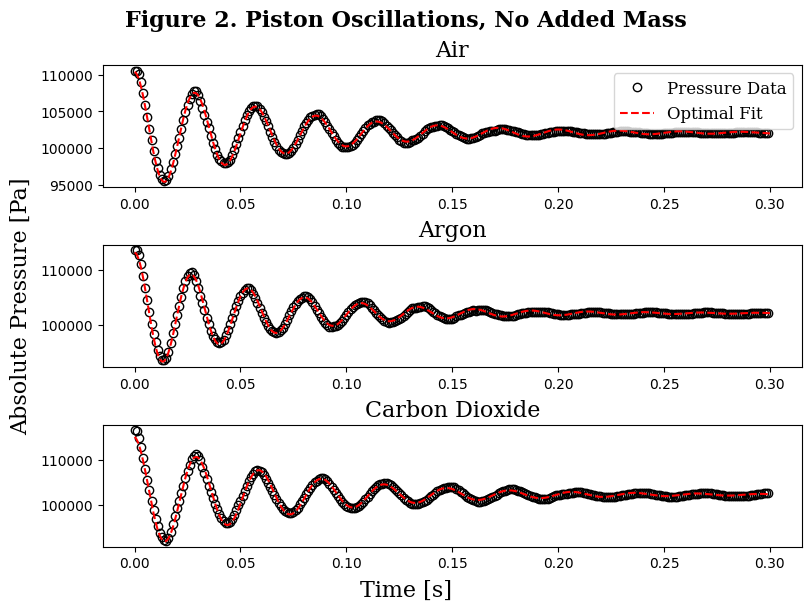

In [99]:
font = dict(family="serif", size=16)
title = dict(family="serif", size=16, weight="bold")
time = np.linspace(0, 0.3, 1000)
print(len(no_weight_plots))
labels = ["Air", "Argon", "Carbon Dioxide"]
fig, axis = plt.subplots(3, 1, constrained_layout=True, figsize=(8,6), dpi=100)
for i, (osc_t, osc_P, fit_params) in enumerate(no_weight_plots[0::5]):
    axis[i].plot(osc_t[:300], osc_P[:300], "ko", label="Pressure Data", fillstyle="none")
    axis[i].plot(time, osc(time, *fit_params[0]), 'r--', label="Optimal Fit")
    axis[i].set_title(labels[i], **font)
    if i == 0:
        axis[i].legend(prop=dict(family="serif", size=12))
    

fig.supxlabel("Time [s]", **font)
fig.supylabel("Absolute Pressure [Pa]", **font)
fig.suptitle("Figure 2. Piston Oscillations, No Added Mass", **title)
plt.show()

15


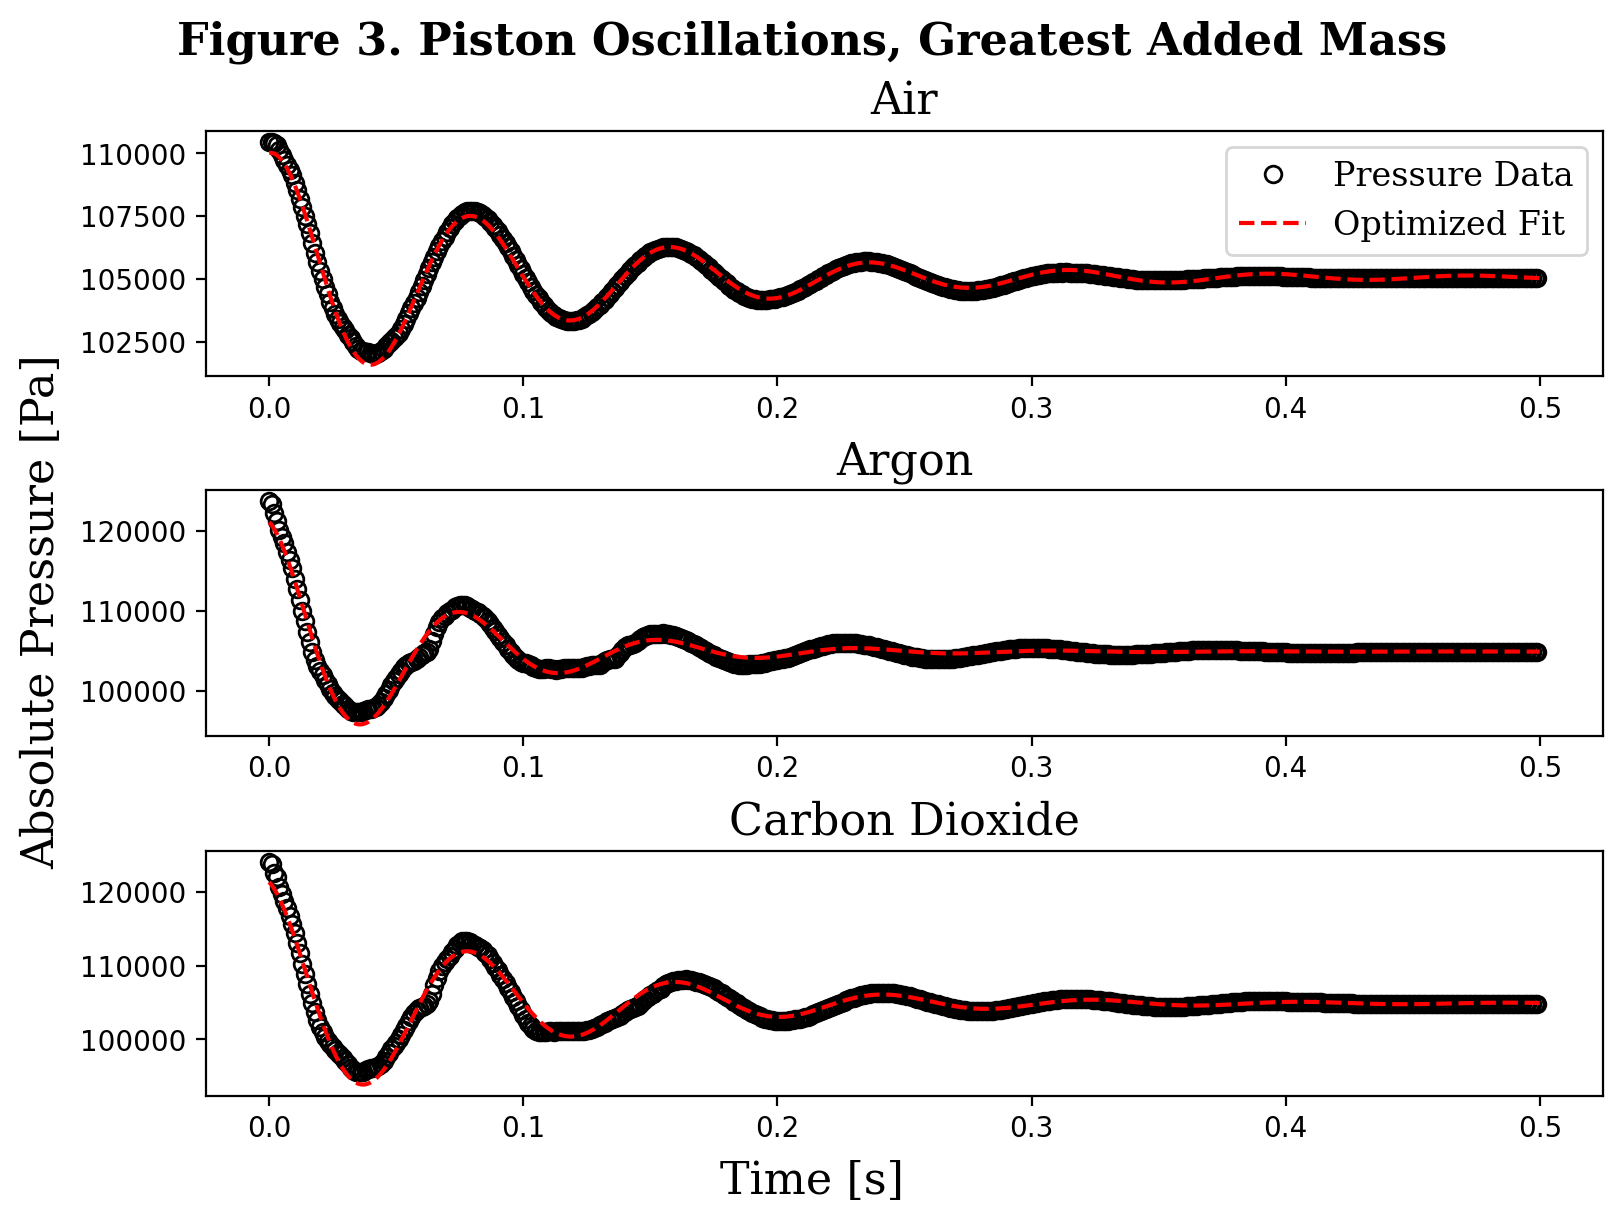

In [100]:
font = dict(family="serif", size=16)
title = dict(family="serif", size=16, weight="bold")
time = np.linspace(0, 0.5, 1000)
print(len(no_weight_plots))
labels = ["Air", "Argon", "Carbon Dioxide"]
fig, axis = plt.subplots(3, 1, constrained_layout=True, figsize=(8,6), dpi=200)
for i, (osc_t, osc_P, fit_params) in enumerate(weight_plots[0::5]):
    axis[i].plot(osc_t[:500], osc_P[:500], "ko", label="Pressure Data", fillstyle="none")
    axis[i].plot(time, osc(time, *fit_params[0]), 'r--', label="Optimized Fit")
    axis[i].set_title(labels[i], **font)
    if i == 0:
        axis[i].legend(prop=dict(family="serif", size=12))
    

fig.supxlabel("Time [s]", **font)
fig.supylabel("Absolute Pressure [Pa]", **font)
fig.suptitle("Figure 3. Piston Oscillations, Greatest Added Mass", **title)
plt.show()